<a href="https://colab.research.google.com/github/AngelLinaStarshine/Books/blob/master/abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.3748 - loss: 1.1401 - val_accuracy: 0.4878 - val_loss: 1.0324
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4797 - loss: 1.0145 - val_accuracy: 0.5156 - val_loss: 0.9613
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5211 - loss: 0.9554 - val_accuracy: 0.5218 - val_loss: 0.8998
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5028 - loss: 0.9220 - val_accuracy: 0.5323 - val_loss: 0.8865
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5382 - loss: 0.8851 - val_accuracy: 0.5294 - val_loss: 0.8814
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5287 - loss: 0.8838 - val_accuracy: 0.5438 - val_loss: 0.8741
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5240 - loss: 0.9216 - val_accuracy: 0.5184 - val_loss: 0.9242
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4999 - loss: 0.9293 - val_accuracy: 0.5247 - 

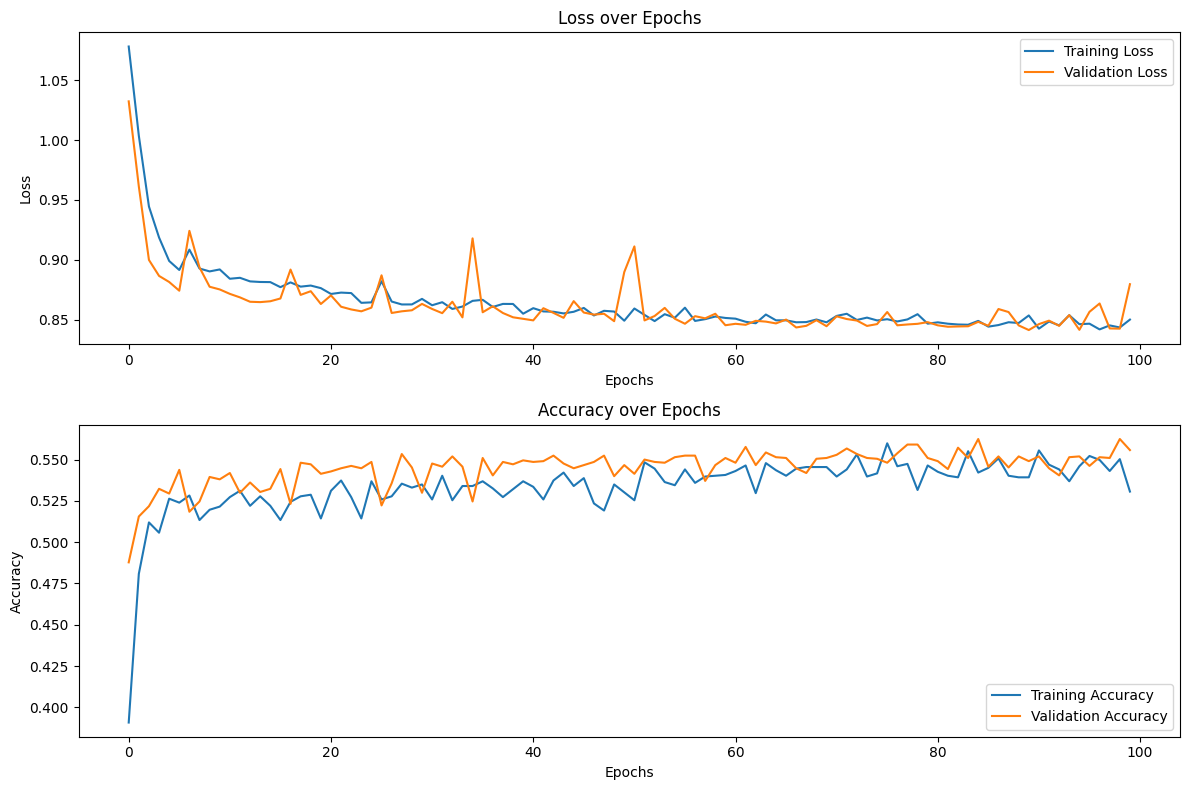

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
                'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
data = pd.read_csv(url, header=None, names=column_names)

data['Sex'] = data['Sex'].map({'M': 0, 'F': 1, 'I': 2})
X = data.drop('Sex', axis=1).values
y = data['Sex'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42)

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=100, validation_data=(X_val, y_val_encoded))

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.savefig('abalone-b.png')
plt.show()
